# Non Linear Regression
## Aditya Bagad

### Import the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('china_gdp.csv')

In [3]:
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plotting the Dataset

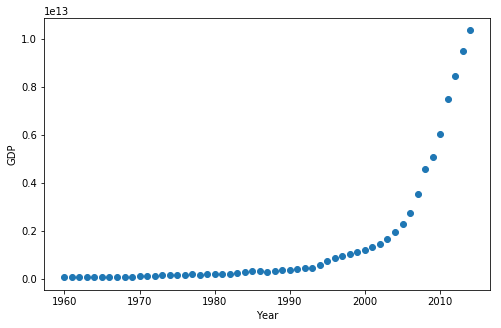

In [4]:
plt.figure(figsize=(8,5))

x_data, y_data = (data['Year'], data['Value'])

plt.scatter(x_data, y_data)
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing a Model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

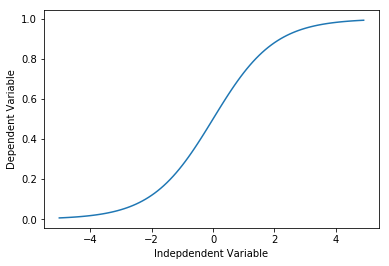

In [5]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [6]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

### Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [7]:
# Lets normalize our data
x_norm_data = x_data/max(x_data)
y_norm_data = y_data/max(y_data)

### [Scipy curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

#### popt : Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized

In [8]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_norm_data, y_norm_data)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


### Plot the results of our regression model

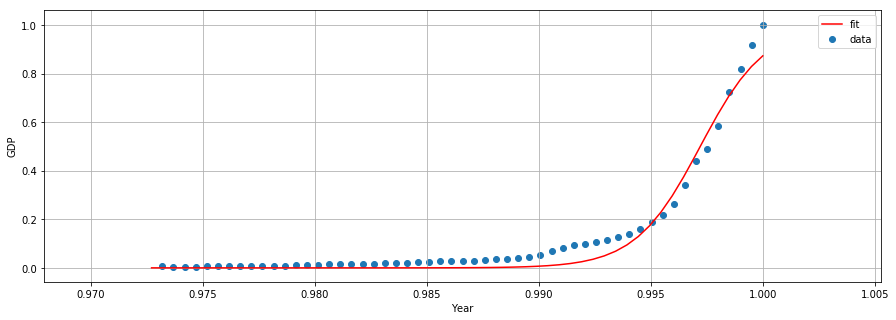

In [9]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)

plt.figure(figsize=(15,5))
plt.scatter(x_norm_data, y_norm_data, label='data')
plt.plot(x,y, label='fit', c='r')
plt.legend()
plt.ylabel('GDP')
plt.xlabel('Year')
plt.grid()
plt.show()

### Splitting the model into training and testing

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_norm_data, y_norm_data, test_size=0.2, random_state=42)

### Build the model using training set

In [11]:
popt, pcov = curve_fit(sigmoid, x_train, y_train)

### Predict using the test set

In [12]:
y_pred = sigmoid(x_test, *popt)

### Model Evaluation

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [13]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98
